# 1) Carga de librerías

- Se importan las librerías pertinentes:

In [17]:
# GENERAL:
from src.constantes import *
from src.funciones import *
from src.clases import *

# CARGA Y DESCARGA DE DATOS, MODELOS Y VECTORIZADORES
import pickle
import joblib

# ANALISIS EXPLORATORIO
import matplotlib.pyplot as plt

# TRAIN TEST:
from sklearn.model_selection import train_test_split

# FEATURE ENGENIEERING O EMBEDDING Y METRICAS:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold # SI FINALMENTE SE USA, EXPLICA REN WORD StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# MODELOS
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# KERAS MACHINE LEARNING
from sklearn.neural_network import MLPClassifier

# KERAS DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# 2) Carga de datos:

In [18]:
# Se introduce la ruta donde se encuentran los datos
archivo_csv = '/apps/works/citas_inss/pruebas_nico/proyecto/datos/data.csv'  # Introducir ruta
# Crear una instancia de CSVReader
csv_reader = LectorCSV(archivo_csv)
df_data = csv_reader.crear_dataframe()

In [19]:
df_data.shape

(416809, 3)

- Se cambian los nombres de las variables/columnas al castellano:

In [20]:
df_data = df_data.rename(columns={"Unnamed: 0": "ID", "text": "TEXTO", "label": "CATEGORIA"})

# 3) Análisis Exploratorio:

- Se calcula la longitud de la fila más larga en la columna 'TEXTO':

In [22]:
max_length = df_data['TEXTO'].apply(len).max()
print("El tamaño de la fila más larga en la columna 'TEXTO' es:", max_length)

El tamaño de la fila más larga en la columna 'TEXTO' es: 830


- Se calcula la longitud de la fila más corta en la columna 'TEXTO':

In [ ]:
min_length = df_data['TEXTO'].apply(len).min()
print("El tamaño de la fila más pequeña en la columna 'TEXTO' es:", min_length)

El tamaño de la fila más pequeña en la columna 'TEXTO' es: 2


- Gráfico de distribuciones de longitudes de texto:

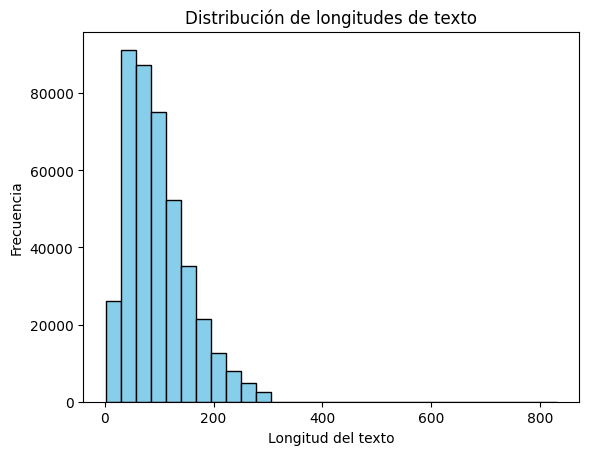

In [ ]:
# Se calculan las longitudes de texto para cada fila en la columna 'TEXTO'
text_lengths = df_data['TEXTO'].apply(len)
# Se crea un histograma de las longitudes de texto
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
# Se agregan etiquetas y título al gráfico
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitudes de texto')
# Se muestra el gráfico
plt.show()

- Gráfico de distribuciones de longitudes de texto en escala logarítmica:

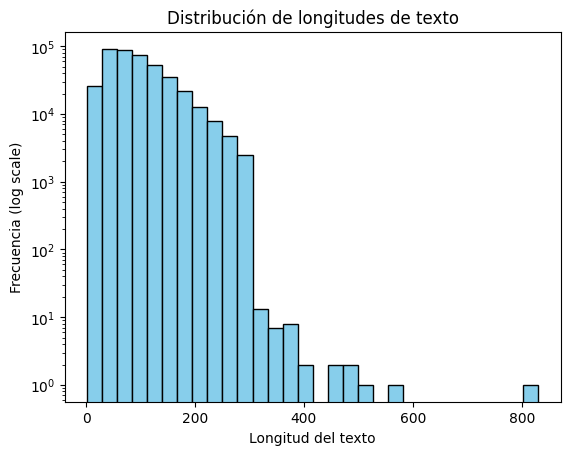

In [ ]:
# Se calculan las longitudes de texto para cada fila en la columna 'TEXTO'
text_lengths = df_data['TEXTO'].apply(len)
# Se crea un histograma de las longitudes de texto con escala logarítmica en el eje y
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.yscale('log')
# Se agregan etiquetas y título al gráfico
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia (log scale)')
plt.title('Distribución de longitudes de texto')
# Se muestra el gráfico
plt.show()

- 'Scatter Plot' de longitudes de texto por fila:

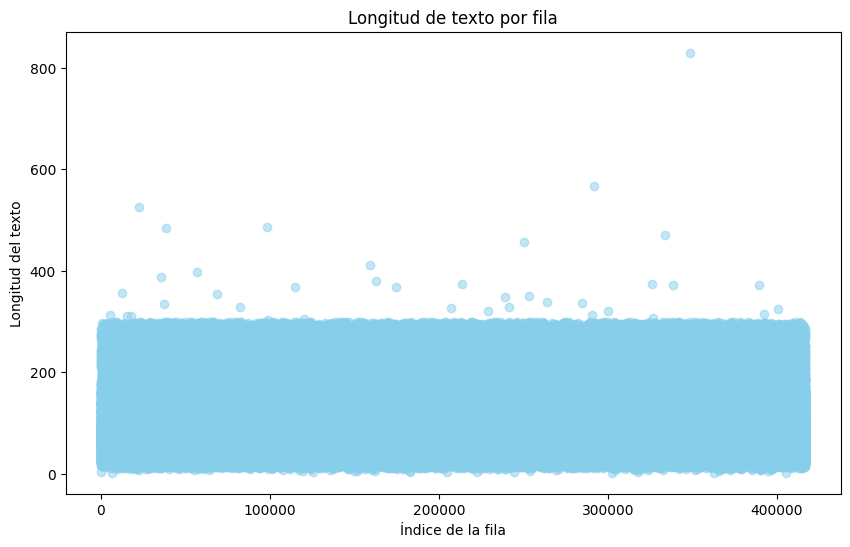

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_data.index, df_data['TEXTO'].apply(len), color='skyblue', alpha=0.5)
plt.xlabel('Índice de la fila')
plt.ylabel('Longitud del texto')
plt.title('Longitud de texto por fila')
plt.show()

- Número de textos que tienen una longitud mayor o igual a 800:


In [ ]:
umbral = 300
num_textos_largos = (df_data['TEXTO'].apply(len) >= umbral).sum()
print("Número de textos con longitud mayor o igual a 800:", num_textos_largos)


Número de textos con longitud mayor o igual a 800: 79


- Número de textos que tienen una longitud menor que 800:


In [ ]:
umbral = 300
num_textos_cortos = (df_data['TEXTO'].apply(len) < umbral).sum()
print("Número de textos con longitud menor que 800:", num_textos_cortos)

Número de textos con longitud menor que 800: 416730


- Mapa de calor de clases:

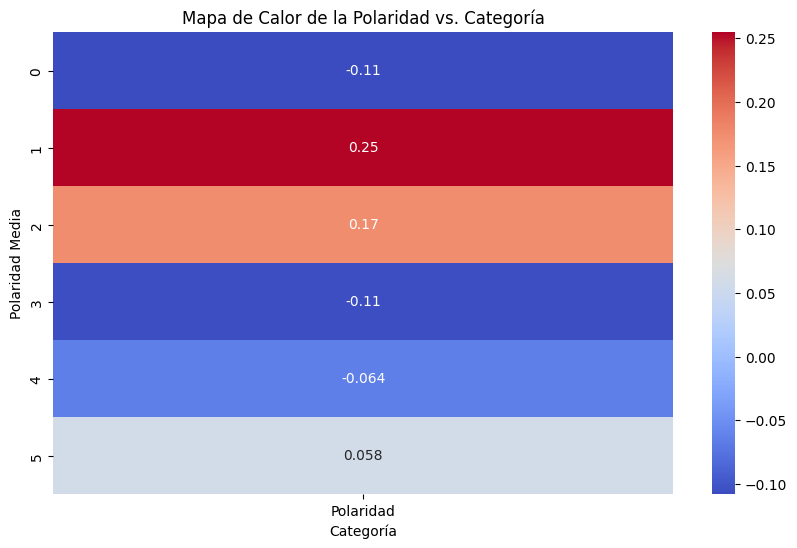

In [ ]:
from textblob import TextBlob
# Se calcula la polaridad del texto utilizando TextBlob
df_data['Polaridad'] = df_data['TEXTO'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Se crea un mapa de calor de la polaridad de los textos
plt.figure(figsize=(10, 6))
sns.heatmap(df_data.pivot_table(index='CATEGORIA', values='Polaridad', aggfunc='mean'), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Polaridad vs. Categoría')
plt.xlabel('Categoría')
plt.ylabel('Polaridad Media')
plt.show()

# 4) Preprocesamiento de datos

- Se convierten las variables (columnas) a su tipo correspondiente:

In [ ]:
# Este loc se deja comentado. 
# Se utiliza para hacer pruebas con pocos datos y que asi las ejecuciones sean rápidas.
# df_data = df_data.loc[0:250]

In [ ]:
df_data['ID'] = df_data['ID'].astype(int)
df_data['TEXTO'] = df_data['TEXTO'].astype(str)
df_data['CATEGORIA'] = df_data['CATEGORIA'].astype(int)

- Se utiliza la clase "Preprocesado" y su función "limpieza" para limpiar y tokenizar los datos.

In [ ]:
# Se crea una instancia de la clase Preprocesado
preprocesamiento = Preprocesado(df_data,'TEXTO')
# Se llama al método limpieza para realizar el preprocesamiento
df_limpio = preprocesamiento.limpieza()

/apps/works/citas_inss/pruebas_nico/proyecto/src/clases.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['TEXTO_LIMPIO'] = self.df['TEXTO_LIMPIO'].apply(lambda x: x.lower())
/apps/works/citas_inss/pruebas_nico/proyecto/src/clases.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['TEXTO_STOPWORDS_LEMATIZACION'] = self.df['TEXTO_LIMPIO'].apply(lambda texto: preprocesamiento(texto, rm_stopwords=True, stemming=False, lematizar=True))


In [ ]:
# Se han comentado las filas de la clase Preprocesado, en la función Limpieza, que se encargan de crear las otras columnas con el resto de combinaciones de preprocesado.
# Por ello solo se crea la columna TEXTO_STOPWORDS_LEMATIZACION, que es la que se usa para el modelo escogido.
# Si se quisiesen realizar más pruebas con modelos y preprocesados, habría que quitar los comentarios.
df_limpio.columns

Index(['ID', 'TEXTO', 'CATEGORIA', 'TEXTO_LIMPIO',
       'TEXTO_STOPWORDS_LEMATIZACION'],
      dtype='object')

In [ ]:
df_limpio.shape

(416776, 5)

In [ ]:
df_data.shape

(416809, 4)

- Se guardan los datos limpios para agilizar procesos:

In [ ]:
# ruta_df_preprocesado = '/apps/works/citas_inss/pruebas_nico/proyecto/datos/df_limpio.pkl'
# df_limpio.to_pickle(ruta_df_preprocesado)



- Se cargan los datos limpios para comenzar el estudio de modelos

In [ ]:
# Se especifica la ruta de los archivos limpios para cargarlos
ruta_df_preprocesado = '/apps/works/citas_inss/pruebas_nico/proyecto/datos/df_limpio.pkl'
df = pd.read_pickle(ruta_df_preprocesado)

# 5) Train-Test-Split

- Se definen las características X ('features'), y la categoría Y objetivo ('target').
- Se realiza un 'train test split' (división de datos) de 70% train, y 30% test.
- El test se divide a su vez en 50%/50% para validación y testeo de modelos.

In [ ]:
# Por lo comentado anteriormente, tambien se oculta esta parte de código, ya que no es necesario incluir estas columnas:
# X = df[['TEXTO_LIMPIO', 'TEXTO_STOPWORDS',
#        'TEXTO_STOPWORDS_STEMMING', 'TEXTO_STOPWORDS_LEMATIZACION',
#        'TEXTO_LEMATIZACION', 'TEXTO_STEMMING']]  # Características

# Se define la variable X de características
X = df['TEXTO_STOPWORDS_LEMATIZACION'] # Características
y = df['CATEGORIA']  # Variable objetivo
# Se divididen los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Se divide el conjunto de prueba en conjuntos de test y validación (50% cada uno)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Se imprime el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])
print("Tamaño del conjunto de validación:", X_val.shape[0])

Tamaño del conjunto de entrenamiento: 291743
Tamaño del conjunto de prueba: 62516
Tamaño del conjunto de validación: 62517


# 6) Feature engenieering o 'embedding', entrenamiento y resultados

- Se definen tuberias de procesamiento ('pipelines') para probar iterativamente distintas combinaciones de embeddings y modelos. De la misma forma, se han probado distintos parametros de estos modelos y embeddings.
- Se realiza 'Parameter' Y Hyperparameter Tunning.

__________________________________________________________________________________________________

# Stochastic Gradient Descent:

In [ ]:
from sklearn.linear_model import SGDClassifier

# Se define el pipeline con SGDClassifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', SGDClassifier(max_iter=2000, tol=1e-3))  # max_iter y tol son configuraciones típicas para SGDClassifier
])

# Se define el diccionario de parámetros para la búsqueda en la rejilla
param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__loss': ['modified_huber', 'log'],  # 'hinge' para SVM lineal, 'log' para regresión logística
    'classification__penalty': ['l2', 'l1', 'elasticnet'],
    'classification__alpha': [0.0001, 0.001, 0.01, 0.1],
    'classification__class_weight': ['balanced', None]
}

# Se define el objeto KFold. 
# kf = KFold(n_splits=10, shuffle=False)
# En este caso se usa StratifiedKFold debido a que los datos no están balanceados
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Se define el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Se entrena el modelo
grid_search.fit(X_train, y_train)

# Se muestran los mejores parámetros y el score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Score: {grid_search.best_score_}")

# Se realizan las predicciones en el conjunto de entrenamiento
y_train_pred = grid_search.best_estimator_.predict(X_train)
score_train = f1_score(y_train, y_train_pred, average='weighted')

# Se realizan las predicciones en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test)
score_test = f1_score(y_test, y_test_pred, average='weighted')

# Se realizan las predicciones en el conjunto de validación
y_val_pred = grid_search.best_estimator_.predict(X_val)
score_val = f1_score(y_val, y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto
print(f"Puntuación en el conjunto de entrenamiento: {score_train}")
print(f"Puntuación en el conjunto de prueba: {score_test}")
print(f"Puntuación en el conjunto de validación: {score_val}")


Mejores parámetros: {'classification__alpha': 0.0001, 'classification__class_weight': None, 'classification__loss': 'log', 'classification__penalty': 'l1', 'vectorizer__analyzer': 'word'}
Score: 0.9067473346042126
Puntuación en el conjunto de entrenamiento: 0.9084155086240672
Puntuación en el conjunto de prueba: 0.9066739199334691
Puntuación en el conjunto de validación: 0.9057350434951722


- Matriz de confusión:

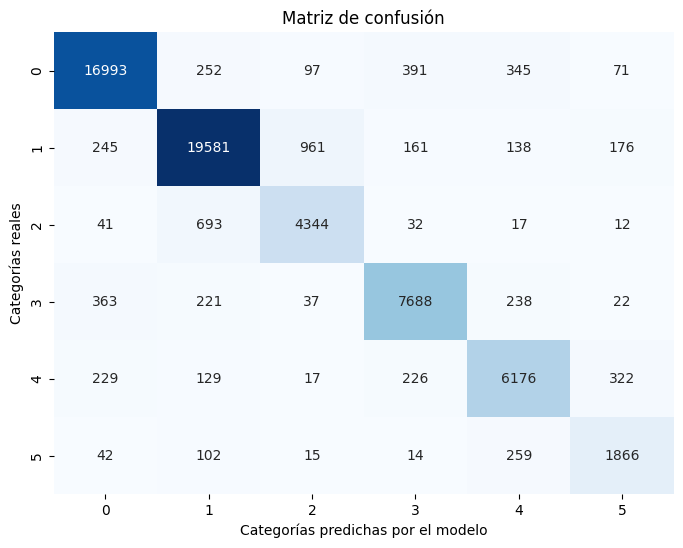

In [ ]:
# Se calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Categorías predichas por el modelo")
plt.ylabel("Categorías reales")
plt.title("Matriz de confusión")
plt.show()

- Curva ROC "uno contra todos" (one-vs-all):

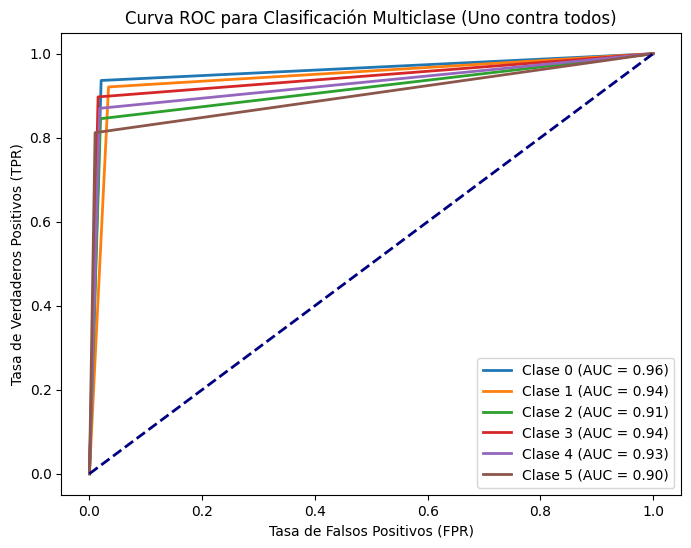

In [ ]:
# Se cambian los nombres por unos mas intuitivos
etiquetas_reales = y_test
etiquetas_probabilidades = y_test_pred
# Se binarizan las etiquetas verdaderas y las predicciones
y_true_bin = label_binarize(etiquetas_reales, classes=[0, 1, 2, 3, 4, 5])
y_pred_bin = label_binarize(etiquetas_probabilidades, classes=[0, 1, 2, 3, 4, 5])
# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):  # Se itera sobre cada clase
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Se traza la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Clasificación Multiclase (Uno contra todos)')
plt.legend(loc='lower right')
plt.show()

# 7) Guardado de modelo y vectorizador

In [ ]:
# Se guarda el vectorizador en un archivo .pkl
with open('/ruta_del_vectorizador/vectorizador_TF_SDG_SW_L.pkl', 'wb') as f:  # Introducir ruta
    joblib.dump(grid_search.best_estimator_.named_steps['vectorizer'], f)
# Se guarda el modelo en un archivo .pkl
with open('/ruta_del_modelo/modelo_TF_SDG_SW_L.pkl', 'wb') as f:  # Introducir ruta
    joblib.dump(grid_search.best_estimator_.named_steps['classification'], f)

___________________________________________________________________________________________________________
# PRUEBAS REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define el pipeline con LogisticRegression
logistic_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000))  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
logistic_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__C': [0.01, 0.1, 1.0, 10.0],
    'classification__class_weight': ['balanced', None]
}

# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para Regresión Logística
logistic_grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=logistic_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo de Regresión Logística
logistic_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo de Regresión Logística
print(f"Mejores parámetros del modelo de Regresión Logística: {logistic_grid_search.best_params_}")
print(f"Score del modelo de Regresión Logística: {logistic_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo de Regresión Logística
logistic_y_train_pred = logistic_grid_search.best_estimator_.predict(X_train)
logistic_score_train = f1_score(y_train, logistic_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo de Regresión Logística
logistic_y_test_pred = logistic_grid_search.best_estimator_.predict(X_test)
logistic_score_test = f1_score(y_test, logistic_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo de Regresión Logística
logistic_y_val_pred = logistic_grid_search.best_estimator_.predict(X_val)
logistic_score_val = f1_score(y_val, logistic_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo de Regresión Logística
print(f"Puntuación en el conjunto de entrenamiento (modelo de Regresión Logística): {logistic_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo de Regresión Logística): {logistic_score_test}")
print(f"Puntuación en el conjunto de validación (modelo de Regresión Logística): {logistic_score_val}")

Mejores parámetros del modelo de Regresión Logística: {'classification__C': 0.1, 'classification__class_weight': 'balanced', 'vectorizer__analyzer': 'word'}
Score del modelo de Regresión Logística: 0.9009105030349618
Puntuación en el conjunto de entrenamiento (modelo de Regresión Logística): 0.9123055740643999
Puntuación en el conjunto de prueba (modelo de Regresión Logística): 0.9014770314090262
Puntuación en el conjunto de validación (modelo de Regresión Logística): 0.9026012414415212


___________________________________________________________________________________________________________
# PRUEBAS MODELO SVC

In [ ]:
from sklearn.svm import SVC

# Define el pipeline con SVC en lugar de LinearSVC
svm_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', SVC()) #max_iter=2000  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
svm_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__C': [0.01, 0.1, 1.0, 10.0],
    'classification__kernel': ['linear'],  # Distintos kernels 'rbf', 'poly', 'sigmoid'
    'classification__class_weight': ['balanced', None]
}

# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para SVM
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo SVM
svm_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo SVM
print(f"Mejores parámetros del modelo SVM: {svm_grid_search.best_params_}")
print(f"Score del modelo SVM: {svm_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo SVM
svm_y_train_pred = svm_grid_search.best_estimator_.predict(X_train)
svm_score_train = f1_score(y_train, svm_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo SVM
svm_y_test_pred = svm_grid_search.best_estimator_.predict(X_test)
svm_score_test = f1_score(y_test, svm_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo SVM
svm_y_val_pred = svm_grid_search.best_estimator_.predict(X_val)
svm_score_val = f1_score(y_val, svm_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo SVM
print(f"Puntuación en el conjunto de entrenamiento (modelo SVM): {svm_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo SVM): {svm_score_test}")
print(f"Puntuación en el conjunto de validación (modelo SVM): {svm_score_val}")


__________________________________________________________________

# PRUEBAS LINEAR SVC

In [ ]:
from sklearn.svm import LinearSVC

# Define el pipeline con LinearSVC en lugar de SGDClassifier
svm_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', LinearSVC(multi_class='crammer_singer', max_iter=2000))  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
svm_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__C': [0.01, 0.1, 1.0, 10.0],
    'classification__class_weight': ['balanced', None]
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para SVM
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo SVM
svm_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo SVM
print(f"Mejores parámetros del modelo SVM: {svm_grid_search.best_params_}")
print(f"Score del modelo SVM: {svm_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo SVM
svm_y_train_pred = svm_grid_search.best_estimator_.predict(X_train)
svm_score_train = f1_score(y_train, svm_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo SVM
svm_y_test_pred = svm_grid_search.best_estimator_.predict(X_test)
svm_score_test = f1_score(y_test, svm_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo SVM
svm_y_val_pred = svm_grid_search.best_estimator_.predict(X_val)
svm_score_val = f1_score(y_val, svm_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo SVM
print(f"Puntuación en el conjunto de entrenamiento (modelo SVM): {svm_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo SVM): {svm_score_test}")
print(f"Puntuación en el conjunto de validación (modelo SVM): {svm_score_val}")


__________________________________________________________________
# PRUEBAS MODELO SVM ONE VS REST 

In [ ]:
from sklearn.svm import SVC

# Define el pipeline con SVC y multi_class='ovr'
svm_ovr_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', SVC(kernel='linear', decision_function_shape='ovr'))  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
svm_ovr_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__C': [0.01, 0.1, 1.0, 10.0],  # Parámetro de regularización
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para SVM con ovr
svm_ovr_grid_search = GridSearchCV(
    estimator=svm_ovr_pipeline,
    param_grid=svm_ovr_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo SVM con ovr
svm_ovr_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo SVM con ovr
print(f"Mejores parámetros del modelo SVM con ovr: {svm_ovr_grid_search.best_params_}")
print(f"Score del modelo SVM con ovr: {svm_ovr_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo SVM con ovr
svm_ovr_y_train_pred = svm_ovr_grid_search.best_estimator_.predict(X_train)
svm_ovr_score_train = f1_score(y_train, svm_ovr_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo SVM con ovr
svm_ovr_y_test_pred = svm_ovr_grid_search.best_estimator_.predict(X_test)
svm_ovr_score_test = f1_score(y_test, svm_ovr_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo SVM con ovr
svm_ovr_y_val_pred = svm_ovr_grid_search.best_estimator_.predict(X_val)
svm_ovr_score_val = f1_score(y_val, svm_ovr_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo SVM con ovr
print(f"Puntuación en el conjunto de entrenamiento (modelo SVM con ovr): {svm_ovr_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo SVM con ovr): {svm_ovr_score_test}")
print(f"Puntuación en el conjunto de validación (modelo SVM con ovr): {svm_ovr_score_val}")

KeyboardInterrupt: 

__________________________________________________________________

# PRUEBAS MODELO RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define el pipeline con RandomForestClassifier
rf_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', RandomForestClassifier())  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
rf_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'classification__max_depth': [None, 10, 20, 30],  # Profundidad máxima de cada árbol
    'classification__min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'classification__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para ser un nodo hoja
    'classification__class_weight': ['balanced', None]
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para Bosques Aleatorios
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo de Bosques Aleatorios
rf_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo de Bosques Aleatorios
print(f"Mejores parámetros del modelo de Bosques Aleatorios: {rf_grid_search.best_params_}")
print(f"Score del modelo de Bosques Aleatorios: {rf_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo de Bosques Aleatorios
rf_y_train_pred = rf_grid_search.best_estimator_.predict(X_train)
rf_score_train = f1_score(y_train, rf_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo de Bosques Aleatorios
rf_y_test_pred = rf_grid_search.best_estimator_.predict(X_test)
rf_score_test = f1_score(y_test, rf_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo de Bosques Aleatorios
rf_y_val_pred = rf_grid_search.best_estimator_.predict(X_val)
rf_score_val = f1_score(y_val, rf_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo de Bosques Aleatorios
print(f"Puntuación en el conjunto de entrenamiento (modelo de Bosques Aleatorios): {rf_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo de Bosques Aleatorios): {rf_score_test}")
print(f"Puntuación en el conjunto de validación (modelo de Bosques Aleatorios): {rf_score_val}")

KeyboardInterrupt: 

__________________________________________________________________

# PRUEBAS MODELO ARBOLES DE DECISION

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define el pipeline con DecisionTreeClassifier
tree_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', DecisionTreeClassifier())  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
tree_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__max_depth': [None, 10, 20, 30],
    'classification__min_samples_split': [2, 5, 10],
    'classification__min_samples_leaf': [1, 2, 4],
    'classification__class_weight': ['balanced', None]
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para Árboles de Decisión
tree_grid_search = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=tree_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo de Árboles de Decisión
tree_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo de Árboles de Decisión
print(f"Mejores parámetros del modelo de Árboles de Decisión: {tree_grid_search.best_params_}")
print(f"Score del modelo de Árboles de Decisión: {tree_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo de Árboles de Decisión
tree_y_train_pred = tree_grid_search.best_estimator_.predict(X_train)
tree_score_train = f1_score(y_train, tree_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo de Árboles de Decisión
tree_y_test_pred = tree_grid_search.best_estimator_.predict(X_test)
tree_score_test = f1_score(y_test, tree_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo de Árboles de Decisión
tree_y_val_pred = tree_grid_search.best_estimator_.predict(X_val)
tree_score_val = f1_score(y_val, tree_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo de Árboles de Decisión
print(f"Puntuación en el conjunto de entrenamiento (modelo de Árboles de Decisión): {tree_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo de Árboles de Decisión): {tree_score_test}")
print(f"Puntuación en el conjunto de validación (modelo de Árboles de Decisión): {tree_score_val}")

Mejores parámetros del modelo de Árboles de Decisión: {'classification__class_weight': 'balanced', 'classification__max_depth': None, 'classification__min_samples_leaf': 4, 'classification__min_samples_split': 10, 'vectorizer__analyzer': 'word'}
Score del modelo de Árboles de Decisión: 0.8726621638847225
Puntuación en el conjunto de entrenamiento (modelo de Árboles de Decisión): 0.9077975295218808
Puntuación en el conjunto de prueba (modelo de Árboles de Decisión): 0.8739531430223019
Puntuación en el conjunto de validación (modelo de Árboles de Decisión): 0.8747762097888225


__________________________________________________________________

# PRUEBAS MODELO K - VECINOS MAS CERCANOS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Define la validación cruzada con k = 5
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el pipeline con KNeighborsClassifier
knn_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', KNeighborsClassifier())  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
knn_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__n_neighbors': [3, 5, 7, 9],
    'classification__weights': ['uniform', 'distance'],
    'classification__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para k-Vecinos más Cercanos
knn_grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo de k-Vecinos más Cercanos
knn_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo de k-Vecinos más Cercanos
print(f"Mejores parámetros del modelo de k-Vecinos más Cercanos: {knn_grid_search.best_params_}")
print(f"Score del modelo de k-Vecinos más Cercanos: {knn_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo de k-Vecinos más Cercanos
knn_y_train_pred = knn_grid_search.best_estimator_.predict(X_train)
knn_score_train = f1_score(y_train, knn_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo de k-Vecinos más Cercanos
knn_y_test_pred = knn_grid_search.best_estimator_.predict(X_test)
knn_score_test = f1_score(y_test, knn_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo de k-Vecinos más Cercanos
knn_y_val_pred = knn_grid_search.best_estimator_.predict(X_val)
knn_score_val = f1_score(y_val, knn_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo de k-Vecinos más Cercanos
print(f"Puntuación en el conjunto de entrenamiento (modelo de k-Vecinos más Cercanos): {knn_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo de k-Vecinos más Cercanos): {knn_score_test}")
print(f"Puntuación en el conjunto de validación (modelo de k-Vecinos más Cercanos): {knn_score_val}")


__________________________________________________________________

# PRUEBAS MODELO MACHINE LEARNING

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define el pipeline con MLPClassifier
mlp_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', MLPClassifier())  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
mlp_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],  # Distintas arquitecturas de capas ocultas
    'classification__activation': ['relu', 'tanh', 'logistic'],  # Funciones de activación
    'classification__alpha': [0.0001, 0.001, 0.01],  # Parámetro de regularización
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para MLPClassifier
mlp_grid_search = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=mlp_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo MLPClassifier
mlp_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo MLPClassifier
print(f"Mejores parámetros del modelo MLPClassifier: {mlp_grid_search.best_params_}")
print(f"Score del modelo MLPClassifier: {mlp_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo MLPClassifier
mlp_y_train_pred = mlp_grid_search.best_estimator_.predict(X_train)
mlp_score_train = f1_score(y_train, mlp_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo MLPClassifier
mlp_y_test_pred = mlp_grid_search.best_estimator_.predict(X_test)
mlp_score_test = f1_score(y_test, mlp_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo MLPClassifier
mlp_y_val_pred = mlp_grid_search.best_estimator_.predict(X_val)
mlp_score_val = f1_score(y_val, mlp_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo MLPClassifier
print(f"Puntuación en el conjunto de entrenamiento (modelo MLPClassifier): {mlp_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo MLPClassifier): {mlp_score_test}")
print(f"Puntuación en el conjunto de validación (modelo MLPClassifier): {mlp_score_val}")


__________________________________________________________________

# PRUEBAS MODELO GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define el pipeline con GradientBoostingClassifier
gb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', GradientBoostingClassifier())  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
gb_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    'classification__n_estimators': [50, 100, 200],  # Número de estimadores
    'classification__learning_rate': [0.01, 0.1, 0.5],  # Tasa de aprendizaje
    'classification__max_depth': [3, 5, 7],  # Profundidad máxima del árbol
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para GradientBoostingClassifier
gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo GradientBoostingClassifier
gb_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo GradientBoostingClassifier
print(f"Mejores parámetros del modelo GradientBoostingClassifier: {gb_grid_search.best_params_}")
print(f"Score del modelo GradientBoostingClassifier: {gb_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo GradientBoostingClassifier
gb_y_train_pred = gb_grid_search.best_estimator_.predict(X_train)
gb_score_train = f1_score(y_train, gb_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo GradientBoostingClassifier
gb_y_test_pred = gb_grid_search.best_estimator_.predict(X_test)
gb_score_test = f1_score(y_test, gb_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo GradientBoostingClassifier
gb_y_val_pred = gb_grid_search.best_estimator_.predict(X_val)
gb_score_val = f1_score(y_val, gb_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo GradientBoostingClassifier
print(f"Puntuación en el conjunto de entrenamiento (modelo GradientBoostingClassifier): {gb_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo GradientBoostingClassifier): {gb_score_test}")
print(f"Puntuación en el conjunto de validación (modelo GradientBoostingClassifier): {gb_score_val}")

__________________________________________________________________

# PRUEBAS MODELO BAYES NAIVE

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define el pipeline con GaussianNB
nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classification', GaussianNB())  
])

# Define el diccionario de parámetros para la búsqueda en la rejilla
nb_param_grid = {
    'vectorizer__analyzer': ['word', 'char_wb'],
    # No hay hiperparámetros específicos para GaussianNB
}
# Define el objeto KFold
# kf = KFold(n_splits=10, shuffle=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define el objeto GridSearchCV para GaussianNB
nb_grid_search = GridSearchCV(
    estimator=nb_pipeline,
    param_grid=nb_param_grid,
    cv=kf,
    n_jobs=-1,
    scoring='f1_weighted'
)

# Entrena el modelo GaussianNB
nb_grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros y el score del modelo GaussianNB
print(f"Mejores parámetros del modelo GaussianNB: {nb_grid_search.best_params_}")
print(f"Score del modelo GaussianNB: {nb_grid_search.best_score_}")

# Predicciones en el conjunto de entrenamiento para el modelo GaussianNB
nb_y_train_pred = nb_grid_search.best_estimator_.predict(X_train)
nb_score_train = f1_score(y_train, nb_y_train_pred, average='weighted')

# Predicciones en el conjunto de prueba para el modelo GaussianNB
nb_y_test_pred = nb_grid_search.best_estimator_.predict(X_test)
nb_score_test = f1_score(y_test, nb_y_test_pred, average='weighted')

# Predicciones en el conjunto de validación para el modelo GaussianNB
nb_y_val_pred = nb_grid_search.best_estimator_.predict(X_val)
nb_score_val = f1_score(y_val, nb_y_val_pred, average='weighted')

# Imprimir los F1-score en cada conjunto para el modelo GaussianNB
print(f"Puntuación en el conjunto de entrenamiento (modelo GaussianNB): {nb_score_train}")
print(f"Puntuación en el conjunto de prueba (modelo GaussianNB): {nb_score_test}")
print(f"Puntuación en el conjunto de validación (modelo GaussianNB): {nb_score_val}")

__________________________________________________________________

# PRUEBAS MODELO DEEP LEARNING KERAS

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import pandas as pd

# Supongamos que ya tienes X e y definidos
X = df['TEXTO_STOPWORDS']  # Características
y = df['CATEGORIA']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (60%), validación (20%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad secuencias para que tengan la misma longitud
max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Convertir etiquetas a one-hot encoding
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# Definir modelo de red neuronal
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val_encoded))

# Obtener los scores de entrenamiento, validación y prueba
score_train = model.evaluate(X_train_pad, y_train_encoded, verbose=0)
score_val = model.evaluate(X_val_pad, y_val_encoded, verbose=0)
score_test = model.evaluate(X_test_pad, y_test_encoded, verbose=0)

print(f"Train set score for the Keras model: {score_train[1]}")
print(f"Validation set score for the Keras model: {score_val[1]}")
print(f"Test set score for the Keras model: {score_test[1]}")

Epoch 1/10
3908/3908 [==============================] - 110s 28ms/step - loss: 0.3075 - accuracy: 0.8716 - val_loss: 0.1803 - val_accuracy: 0.9065
Epoch 2/10
3908/3908 [==============================] - 110s 28ms/step - loss: 0.1623 - accuracy: 0.9160 - val_loss: 0.1730 - val_accuracy: 0.9062
Epoch 3/10
3908/3908 [==============================] - 111s 28ms/step - loss: 0.1443 - accuracy: 0.9219 - val_loss: 0.1729 - val_accuracy: 0.9028
Epoch 4/10
3908/3908 [==============================] - 110s 28ms/step - loss: 0.1326 - accuracy: 0.9270 - val_loss: 0.1773 - val_accuracy: 0.8973
Epoch 5/10
3908/3908 [==============================] - 111s 28ms/step - loss: 0.1216 - accuracy: 0.9332 - val_loss: 0.1936 - val_accuracy: 0.8971
Epoch 6/10
3908/3908 [==============================] - 110s 28ms/step - loss: 0.1114 - accuracy: 0.9382 - val_loss: 0.2093 - val_accuracy: 0.8906
Epoch 7/10
3908/3908 [==============================] - 109s 28ms/step - loss: 0.1023 - accuracy: 0.9424 - val_loss: 0

__________________________________________________________________

# PRUEBAS MODELO DEEP LEARNING KERAS 2

In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from keras.utils import to_categorical
import pandas as pd

# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad secuencias para que tengan la misma longitud
max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Convertir etiquetas a one-hot encoding
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# Definir modelo de red neuronal
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val_encoded))

# Obtener los scores de entrenamiento, validación y prueba
score_train = model.evaluate(X_train_pad, y_train_encoded, verbose=0)
score_val = model.evaluate(X_val_pad, y_val_encoded, verbose=0)
score_test = model.evaluate(X_test_pad, y_test_encoded, verbose=0)

print(f"Train set score for the Keras model: {score_train[1]}")
print(f"Validation set score for the Keras model: {score_val[1]}")
print(f"Test set score for the Keras model: {score_test[1]}")


Epoch 1/10
4559/4559 [==============================] - 167s 37ms/step - loss: 0.2897 - accuracy: 0.8757 - val_loss: 0.1787 - val_accuracy: 0.9080
Epoch 2/10
4559/4559 [==============================] - 174s 38ms/step - loss: 0.1589 - accuracy: 0.9153 - val_loss: 0.1669 - val_accuracy: 0.9065
Epoch 3/10
4559/4559 [==============================] - 173s 38ms/step - loss: 0.1434 - accuracy: 0.9208 - val_loss: 0.1700 - val_accuracy: 0.9080
Epoch 4/10
4559/4559 [==============================] - 171s 37ms/step - loss: 0.1335 - accuracy: 0.9245 - val_loss: 0.1767 - val_accuracy: 0.9004
Epoch 5/10
4559/4559 [==============================] - 173s 38ms/step - loss: 0.1244 - accuracy: 0.9291 - val_loss: 0.1863 - val_accuracy: 0.8955
Epoch 6/10
4559/4559 [==============================] - 167s 37ms/step - loss: 0.1148 - accuracy: 0.9332 - val_loss: 0.2028 - val_accuracy: 0.8923
Epoch 7/10
4559/4559 [==============================] - 169s 37ms/step - loss: 0.1066 - accuracy: 0.9374 - val_loss: 0

__________________________________________________________________

# PRUEBAS PARA RESOLVER OVERFITTING

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad secuencias para que tengan la misma longitud
max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Convertir etiquetas a one-hot encoding
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# Definir modelo de red neuronal
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))  # Reducir el número de unidades
model.add(Dense(units=6, activation='softmax'))

# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val_encoded), verbose=1)

# Evaluar el modelo en el conjunto de prueba
score_test = model.evaluate(X_test_pad, y_test_encoded, verbose=0)
print(f"Test set score for the Keras model: {score_test[1]}")

# Calcular predicciones en los conjuntos de entrenamiento, validación y prueba
y_train_pred = model.predict(X_train_pad)
y_val_pred = model.predict(X_val_pad)
y_test_pred = model.predict(X_test_pad)

# Obtener las clases predichas
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calcular F1-score en los conjuntos de entrenamiento, validación y prueba
f1_train = f1_score(y_train, y_train_pred_classes, average='weighted')
f1_val = f1_score(y_val, y_val_pred_classes, average='weighted')
f1_test = f1_score(y_test, y_test_pred_classes, average='weighted')

# Imprimir los F1-score en cada conjunto
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")
print(f"F1-score en el conjunto de validación: {f1_val}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

Epoch 1/10
3908/3908 [==============================] - 112s 28ms/step - loss: 0.3016 - accuracy: 0.8738 - val_loss: 0.1848 - val_accuracy: 0.9060
Epoch 2/10
3908/3908 [==============================] - 115s 29ms/step - loss: 0.1634 - accuracy: 0.9168 - val_loss: 0.1813 - val_accuracy: 0.9016
Epoch 3/10
3908/3908 [==============================] - 114s 29ms/step - loss: 0.1464 - accuracy: 0.9225 - val_loss: 0.1780 - val_accuracy: 0.8982
Epoch 4/10
3908/3908 [==============================] - 113s 29ms/step - loss: 0.1332 - accuracy: 0.9286 - val_loss: 0.1869 - val_accuracy: 0.8984
Epoch 5/10
3908/3908 [==============================] - 113s 29ms/step - loss: 0.1221 - accuracy: 0.9342 - val_loss: 0.1951 - val_accuracy: 0.8940
Epoch 6/10
3908/3908 [==============================] - 113s 29ms/step - loss: 0.1118 - accuracy: 0.9390 - val_loss: 0.2152 - val_accuracy: 0.8916
Epoch 7/10
3908/3908 [==============================] - 113s 29ms/step - loss: 0.1027 - accuracy: 0.9431 - val_loss: 0